In [1]:
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

from matplotlib.path import Path



## Read one game's moments and events dataset

In [2]:
moments_df = pd.read_json("0021500492.json") 

## Create dataframe for movement data appended with events

In [3]:
with open('0021500492.json') as data_file:    
    data = json.load(data_file)
json_normalize(data['events'])

,eventId,home.abbreviation,home.name,home.players,home.teamid,moments,visitor.abbreviation,visitor.name,visitor.players,visitor.teamid
0,1,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695252003, 711.26, 11.99, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
1,2,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695250003, 713.26, 13.15, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
2,3,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695250003, 713.26, 13.15, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
3,4,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695250003, 713.26, 13.15, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
4,5,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695273001, 690.27, 15.38, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
5,6,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695289001, 674.27, 16.68, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
6,7,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695289001, 674.27, 16.68, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
7,9,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695307001, 656.28, 23.78, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
8,10,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695315001, 648.28, 15.78, None, [[-1,...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766
9,11,TOR,Toronto Raptors,"[{u'playerid': 201949, u'lastname': u'Johnson'...",1610612761,"[[1, 1451695353000, 633.0, 24.0, None, [[-1, -...",CHA,Charlotte Hornets,"[{u'playerid': 101107, u'lastname': u'Williams...",1610612766


In [1]:
data['events'][300]["moments"][0]

NameError: name 'data' is not defined

## In array of events , select 300th row, access moments array 0th moment in the possession.  Access the 5th index value, which is array of positions, and select array 1-5 which are a team's positioning

In [5]:
 Positionings = data['events'][300]["moments"][0]

In [6]:
def getHull(moments, teamID):
    points = []
    
    if(moments[5][1][0] == teamID):
        for positions in moments[5][1:6]:
            #print positions
            points.append([positions[2],positions[3]])
        print(points)
    else:
        for positions in moments[5][6:11]:
            #print positions
            points.append([positions[2],positions[3]])
        print(points)
    
    np_points = np.asarray(points)
    np_points
    hull = ConvexHull(np_points)
    
    return hull,np_points

In [7]:
 def distFromCentroid(hull, x,y):
        cx = np.mean(hull.points[hull.vertices,0])
        cy = np.mean(hull.points[hull.vertices,1])
        return ((x-cx)^2+(y-cy)^2)^.5

In [8]:
def isInHull(hull,np_points,x,y):
    #point in hull?
    hull_path = Path( np_points[hull.vertices] )
    isInPath = hull_path.contains_point((x,y))
    return (isInPath == True)

In [18]:
def plotHull(hull1,np_points1):
    #Get centoid
    cx = np.mean(hull1.points[hull1.vertices,0])
    cy = np.mean(hull1.points[hull1.vertices,1])

    for simplex in hull1.simplices:
        plt.plot(np_points1[simplex, 0], np_points1[simplex, 1], 'b-')
        
    #Plot centroid
    plt.plot(cx, cy,'x',ms=20)
    plt.show()
    

In [22]:
def plotHulls(hull1,np_points1, hull2, np_points2):
    #Get centoid
    cx = np.mean(hull1.points[hull1.vertices,0])
    cy = np.mean(hull1.points[hull1.vertices,1])

    for simplex in hull1.simplices:
        plt.plot(np_points1[simplex, 0], np_points1[simplex, 1], 'b-')
    
    cx2 = np.mean(hull2.points[hull2.vertices,0])
    cy2 = np.mean(hull2.points[hull2.vertices,1])
    
    for simplex in hull2.simplices:
        plt.plot(np_points2[simplex, 0], np_points2[simplex, 1], 'r-')
        
    #Plot centroid
    plt.plot(cx, cy,'bx',ms=20)
    plt.plot(cx2, cy2,'rx',ms=20)
    plt.show()
    

In [23]:
hull , points = getHull(Positionings,1610612761)

[[60.41151, 32.66485], [70.71007, 10.27389], [80.18011, 48.05613], [82.94262, 10.0733], [92.10363, 31.53075]]


In [24]:
hull2 ,points2 = getHull(Positionings,1610612766 )

[[78.27704, 36.49579], [72.20007, 25.25712], [79.09978, 11.38747], [88.30466, 29.19922], [84.6491, 14.80223]]


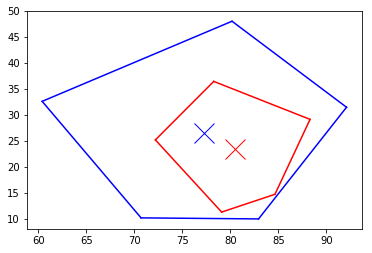

In [25]:
plotHulls(hull,points,hull2,points2)

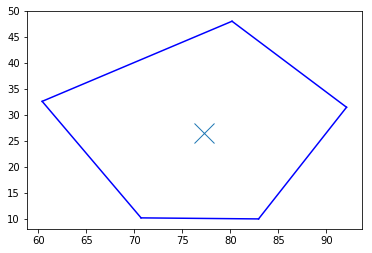

In [29]:
plotHull(hull,points)

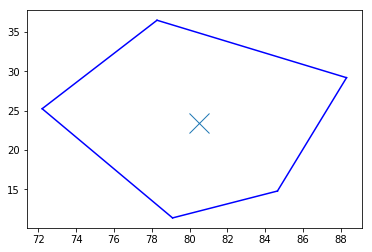

In [28]:
plotHull(hull2,points2)

## Helper Method returns the distance opponents from a playerID
### takesas inputs a moments data 

In [65]:
def distOpFromPlayer(Positionings, playerID):
    #player_x
    #player_y
    #teamID
    for positions in Positionings[5]:
        if positions[1] == playerID:
            player_x = positions[2]
            player_y = positions[3]
            teamID = positions[0]
    
    distsFromplayer= []
    a = [ pow(pow((positions[2]-player_x),2)+pow((positions[3]-player_y),2),.5) for positions in Positionings[5] if (positions[0] != teamID | positions[0] != -1)]
    
        #dist = ((positions[2]-player_x)^2+(positions[3]-player_y)^2)^.5
        #distsFromplayerdistsFromplayer.append(dist)
    print(a)
    

In [66]:
distOpFromPlayer(Positionings, 200768)

[18.271651908475597, 13.922809006321245, 28.31922201009943, 28.10762188836686, 30.108702434221577]
